In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 35.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd

file_path = '/content/333data.xlsx'  # your_file.xlsx 부분에 실제 파일 경로와 이름 입력
data4= pd.read_excel(file_path)

In [ ]:
from konlpy.tag import Okt

han = Okt()

second_column = data4.columns[1]

# 각 행에 대해 토큰화하고 결과를 새로운 열로 추가합니다.
for idx, row in data4.iterrows():
    nouns = han.nouns(row[second_column])
    for i, noun in enumerate(nouns):
        data4.loc[idx, f'noun_{i}'] = noun

In [ ]:
data4

In [ ]:
import numpy as np
noun_columns = data4.columns[2:]

# 각 행에 대해 길이가 1인 단어를 제거하고 결과를 다시 해당 열로 저장합니다.
for idx, row in data4.iterrows():
    # 현재 행의 명사 중에서 길이가 1보다 큰 것들만 선택합니다.
    nouns = [noun for noun in row[noun_columns] if isinstance(noun, str) and len(noun) > 1]

    # 남은 명사들을 해당 열에 다시 저장합니다.
    for i, noun in enumerate(nouns):
        data4.loc[idx, f'{noun_columns[i]}'] = noun

    # 남은 열들을 NaN으로 채웁니다.
    for j in range(i+1, len(noun_columns)):
        data4.loc[idx, f'{noun_columns[j]}'] = np.nan

data4

In [ ]:
data4.to_excel(excel_writer='/content/333data.xlsx')

In [ ]:
savepoint2=data4

In [ ]:
data4

,147,iriver잊어버리신분 찾아가세요 상담실에서 잊어버리신분은 찾아가세요 ~ 쉬는시간에 오세요,noun_0,noun_1,noun_2,noun_3,noun_4,noun_5,noun_6,noun_7,...,noun_198,noun_199,noun_200,noun_201,noun_202,noun_203,noun_204,noun_205,noun_206,noun_207
0,259,3면학 전자기기 ㅋ원래 되던거 아니냐? 엄청 생색내는군.모두 3면학까지만 쓰도록 해...,면학,전자기기,원래,생색,모두,면학,불시,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,185,베이지색 LEE 후드집업학교 어딘가에서 베이지색 LEE후드집업 보신 분 연락주세오ㅠ...,베이지색,후드,집업,학교,어딘가,베이지색,후드,집업,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,170,나주붉근매응속도 테스트가 무지성 마우스클릭하다가 0ms나오면 마우스 클릭 멈추는 반...,나주,속도,테스트,무지,마우스,클릭,다가,마우스,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,421,방금 계정 얻은 32기면 개추 ㅋㅋ,방금,계정,기면,개추,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,516,거기 무명. 새겨들어라.요즘 게시글을 많이 올라오는구나.나보다 조회수 많은건 못 보...,거기,무명,요즘,게시,회수,조절,욕심,남자,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,206,LG gram 와콤펜 찾아요!,와콤,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,246,복사기 사용을 제대로 해 주시길 바랍니다,복사기,사용,제대로,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,316,2-1반 테트리스 내전,테트리스,내전,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,62,만신현호,신현호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 3번째부터 끝까지의 열을 선택합니다.
import numpy as np
noun_columns = data4.columns[2:]

# 사용자가 직접 정의한 불용어 리스트입니다.
stop_words = ['모두','어딘가','다가','건가','기면','거기','한다민','미로', '더욱','왕성','정요','조금','때길',
              '아시','키츠네','메종','매가','진짜','손톱','대충','만약','박소','원래','선전','최준','붕어빵','경청','디스',
              '버댓','김현민','모두','에코','가지','다시','하나요','무슨','가요','김지형','이번','신가','읍니','이제','모든','버려진',
              '심보','깊이','세대','즈음','고요','승연','아이','정인','백관','멍충','모델','소자','아두이노','공구','재료','허용','범위',
              '구매','잡것','상실','김민기','왜케','먹기','사료','중인','임시','대신','바람','조사해','어그','수혜','그거','안이','대하',
              '어머','구의','앙케이트','정요','송민주','슈링클스','보지','읙읜읟읠읨읩읫읭','읮읯읰읱읲읳','읚읬읛읝읞읡읢읣','읤읥읦읧읪','자게',
              '대요','기','백','녀석','내','말','날','글임','와콤','부','가라','줄무늬','셔츠','하늘색','진짜','누군가','전브스','글임','후드','집업','가장','사실','날','와콤',
              '에이','최대한','때문','일반','아래','뱅크','주시','버런','뒷이야기','올해','폐동','정응찬',
              '보드','하버','라리','물리학자','자유게시판','양도','기','빨','내','말','로','저','이','뭐','읭',
              '붐','거','온','']

# 각 행에 대해 불용어를 제거하고 결과를 다시 해당 열로 저장합니다.
for idx, row in data4.iterrows():
    # 현재 행의 명사 중에서 사용자가 정의한 불용어가 아닌 것들만 선택합니다.
    nouns = [noun for noun in row[noun_columns] if isinstance(noun, str) and noun not in stop_words]

    # 남은 명사들을 해당 열에 다시 저장합니다.
    for i, noun in enumerate(nouns):
        data4.loc[idx, f'{noun_columns[i]}'] = noun

    # 남은 열들을 NaN으로 채웁니다.
    for j in range(i+1, len(noun_columns)):
        data4.loc[idx, f'{noun_columns[j]}'] = np.nan

data4

,Unnamed: 0,147,iriver잊어버리신분 찾아가세요 상담실에서 잊어버리신분은 찾아가세요 ~ 쉬는시간에 오세요,noun_0,noun_1,noun_2,noun_3,noun_4,noun_5,noun_6,...,noun_198,noun_199,noun_200,noun_201,noun_202,noun_203,noun_204,noun_205,noun_206,noun_207
0,0,259,3면학 전자기기 ㅋ원래 되던거 아니냐? 엄청 생색내는군.모두 3면학까지만 쓰도록 해...,면학,전자기기,생색,면학,불시,정윤,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,185,베이지색 LEE 후드집업학교 어딘가에서 베이지색 LEE후드집업 보신 분 연락주세오ㅠ...,베이지색,학교,베이지색,보신,연락,교복,보이지,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,170,나주붉근매응속도 테스트가 무지성 마우스클릭하다가 0ms나오면 마우스 클릭 멈추는 반...,나주,속도,테스트,무지,마우스,클릭,마우스,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,421,방금 계정 얻은 32기면 개추 ㅋㅋ,방금,계정,개추,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,516,거기 무명. 새겨들어라.요즘 게시글을 많이 올라오는구나.나보다 조회수 많은건 못 보...,무명,요즘,게시,회수,조절,욕심,남자,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,434,206,LG gram 와콤펜 찾아요!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,435,246,복사기 사용을 제대로 해 주시길 바랍니다,복사기,사용,제대로,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,436,316,2-1반 테트리스 내전,테트리스,내전,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,437,62,만신현호,신현호,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data4.to_excel(excel_writer='/content/4444data.xlsx')

In [ ]:
df=data4

In [ ]:
# 'df'는 우리가 가지고 있는 DataFrame 입니다.
# df.columns[0]은 첫 번째 열의 이름을 반환합니다.
df = df.drop(df.columns[0], axis=1)
df = df.iloc[:, 1:]

In [ ]:
df

,iriver잊어버리신분 찾아가세요 상담실에서 잊어버리신분은 찾아가세요 ~ 쉬는시간에 오세요,noun_0,noun_1,noun_2,noun_3,noun_4,noun_5,noun_6,noun_7,noun_8,...,noun_198,noun_199,noun_200,noun_201,noun_202,noun_203,noun_204,noun_205,noun_206,noun_207
0,3면학 전자기기 ㅋ원래 되던거 아니냐? 엄청 생색내는군.모두 3면학까지만 쓰도록 해...,면학,전자기기,생색,면학,불시,정윤,정윤,정윤,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,베이지색 LEE 후드집업학교 어딘가에서 베이지색 LEE후드집업 보신 분 연락주세오ㅠ...,베이지색,학교,베이지색,보신,연락,교복,보이지,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,나주붉근매응속도 테스트가 무지성 마우스클릭하다가 0ms나오면 마우스 클릭 멈추는 반...,나주,속도,테스트,무지,마우스,클릭,마우스,클릭,반응속도,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,방금 계정 얻은 32기면 개추 ㅋㅋ,방금,계정,개추,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,거기 무명. 새겨들어라.요즘 게시글을 많이 올라오는구나.나보다 조회수 많은건 못 보...,무명,요즘,게시,회수,조절,욕심,남자,정윤,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,LG gram 와콤펜 찾아요!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,복사기 사용을 제대로 해 주시길 바랍니다,복사기,사용,제대로,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,2-1반 테트리스 내전,테트리스,내전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,만신현호,신현호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns.values[0] = 'content'

In [ ]:
df

,content,noun_0,noun_1,noun_2,noun_3,noun_4,noun_5,noun_6,noun_7,noun_8,...,noun_199,noun_200,noun_201,noun_202,noun_203,noun_204,noun_205,noun_206,noun_207,merged_nouns
0,3면학 전자기기 ㅋ원래 되던거 아니냐? 엄청 생색내는군.모두 3면학까지만 쓰도록 해...,면학,전자기기,생색,면학,불시,정윤,정윤,정윤,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,면학 전자기기 생색 면학 불시 정윤 정윤 정윤 정윤 nan nan nan nan n...
1,베이지색 LEE 후드집업학교 어딘가에서 베이지색 LEE후드집업 보신 분 연락주세오ㅠ...,베이지색,학교,베이지색,보신,연락,교복,보이지,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,베이지색 학교 베이지색 보신 연락 교복 보이지 nan nan nan nan nan ...
2,나주붉근매응속도 테스트가 무지성 마우스클릭하다가 0ms나오면 마우스 클릭 멈추는 반...,나주,속도,테스트,무지,마우스,클릭,마우스,클릭,반응속도,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,나주 속도 테스트 무지 마우스 클릭 마우스 클릭 반응속도 측정 nan nan nan...
3,방금 계정 얻은 32기면 개추 ㅋㅋ,방금,계정,개추,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,방금 계정 개추 nan nan nan nan nan nan nan nan nan n...
4,거기 무명. 새겨들어라.요즘 게시글을 많이 올라오는구나.나보다 조회수 많은건 못 보...,무명,요즘,게시,회수,조절,욕심,남자,정윤,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,무명 요즘 게시 회수 조절 욕심 남자 정윤 정윤 nan nan nan nan nan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,LG gram 와콤펜 찾아요!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan nan nan nan nan nan nan nan nan nan nan na...
435,복사기 사용을 제대로 해 주시길 바랍니다,복사기,사용,제대로,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,복사기 사용 제대로 nan nan nan nan nan nan nan nan nan...
436,2-1반 테트리스 내전,테트리스,내전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,테트리스 내전 nan nan nan nan nan nan nan nan nan na...
437,만신현호,신현호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,신현호 nan nan nan nan nan nan nan nan nan nan na...


In [ ]:
dfsave=df

In [ ]:
dfsave2=dfsave

In [ ]:
dfsave3=dfsave2

In [ ]:
dfsave3=df

In [ ]:
dfsave4=dfsave3

In [ ]:
dfsave3 = dfsave3.drop(df.columns[0], axis=1)

In [ ]:
dfb = df.drop(df.columns[-1], axis=1)


In [ ]:
dfa

,content,noun_0,noun_1,noun_2,noun_3,noun_4,noun_5,noun_6,noun_7,noun_8,...,noun_198,noun_199,noun_200,noun_201,noun_202,noun_203,noun_204,noun_205,noun_206,noun_207
0,3면학 전자기기 ㅋ원래 되던거 아니냐? 엄청 생색내는군.모두 3면학까지만 쓰도록 해...,면학,전자기기,생색,면학,불시,정윤,정윤,정윤,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,베이지색 LEE 후드집업학교 어딘가에서 베이지색 LEE후드집업 보신 분 연락주세오ㅠ...,베이지색,학교,베이지색,보신,연락,교복,보이지,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,나주붉근매응속도 테스트가 무지성 마우스클릭하다가 0ms나오면 마우스 클릭 멈추는 반...,나주,속도,테스트,무지,마우스,클릭,마우스,클릭,반응속도,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,방금 계정 얻은 32기면 개추 ㅋㅋ,방금,계정,개추,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,거기 무명. 새겨들어라.요즘 게시글을 많이 올라오는구나.나보다 조회수 많은건 못 보...,무명,요즘,게시,회수,조절,욕심,남자,정윤,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,LG gram 와콤펜 찾아요!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,복사기 사용을 제대로 해 주시길 바랍니다,복사기,사용,제대로,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,2-1반 테트리스 내전,테트리스,내전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,만신현호,신현호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfb= dfb.dropna(how='all')

In [ ]:
dfa

,content,noun_0,noun_1,noun_2,noun_3,noun_4,noun_5,noun_6,noun_7,noun_8,...,noun_198,noun_199,noun_200,noun_201,noun_202,noun_203,noun_204,noun_205,noun_206,noun_207
0,3면학 전자기기 ㅋ원래 되던거 아니냐? 엄청 생색내는군.모두 3면학까지만 쓰도록 해...,면학,전자기기,생색,면학,불시,정윤,정윤,정윤,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,베이지색 LEE 후드집업학교 어딘가에서 베이지색 LEE후드집업 보신 분 연락주세오ㅠ...,베이지색,학교,베이지색,보신,연락,교복,보이지,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,나주붉근매응속도 테스트가 무지성 마우스클릭하다가 0ms나오면 마우스 클릭 멈추는 반...,나주,속도,테스트,무지,마우스,클릭,마우스,클릭,반응속도,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,방금 계정 얻은 32기면 개추 ㅋㅋ,방금,계정,개추,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,거기 무명. 새겨들어라.요즘 게시글을 많이 올라오는구나.나보다 조회수 많은건 못 보...,무명,요즘,게시,회수,조절,욕심,남자,정윤,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,LG gram 와콤펜 찾아요!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,복사기 사용을 제대로 해 주시길 바랍니다,복사기,사용,제대로,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,2-1반 테트리스 내전,테트리스,내전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,만신현호,신현호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfsavea=dfsave

In [ ]:
dfsavea

,noun_0,noun_1,noun_2,noun_3,noun_4,noun_5,noun_6,noun_7,noun_8,noun_9,...,noun_198,noun_199,noun_200,noun_201,noun_202,noun_203,noun_204,noun_205,noun_206,noun_207
0,면학,전자기기,생색,면학,불시,정윤,정윤,정윤,정윤,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,베이지색,학교,베이지색,보신,연락,교복,보이지,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,나주,속도,테스트,무지,마우스,클릭,마우스,클릭,반응속도,측정,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,방금,계정,개추,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,무명,요즘,게시,회수,조절,욕심,남자,정윤,정윤,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,교편,사연,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,복사기,사용,제대로,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,테트리스,내전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,신현호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfsave.to_excel(excel_writer='/content/55555data.xlsx')

In [ ]:
dfsave=dfsave.drop(df.index[81])

In [ ]:
dfsave

,noun_0,noun_1,noun_2,noun_3,noun_4,noun_5,noun_6,noun_7,noun_8,noun_9,...,noun_198,noun_199,noun_200,noun_201,noun_202,noun_203,noun_204,noun_205,noun_206,noun_207
0,면학,전자기기,생색,면학,불시,정윤,정윤,정윤,정윤,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,베이지색,학교,베이지색,보신,연락,교복,보이지,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,나주,속도,테스트,무지,마우스,클릭,마우스,클릭,반응속도,측정,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,방금,계정,개추,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,무명,요즘,게시,회수,조절,욕심,남자,정윤,정윤,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,교편,사연,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,복사기,사용,제대로,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,테트리스,내전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,신현호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfsave2=dfsave

In [ ]:
dfb= dfb.dropna(axis=1, how='all')

In [ ]:
dfa

,content,noun_0,noun_1,noun_2,noun_3,noun_4,noun_5,noun_6,noun_7,noun_8,...,noun_146,noun_147,noun_148,noun_149,noun_150,noun_151,noun_152,noun_153,noun_154,noun_155
0,3면학 전자기기 ㅋ원래 되던거 아니냐? 엄청 생색내는군.모두 3면학까지만 쓰도록 해...,면학,전자기기,생색,면학,불시,정윤,정윤,정윤,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,베이지색 LEE 후드집업학교 어딘가에서 베이지색 LEE후드집업 보신 분 연락주세오ㅠ...,베이지색,학교,베이지색,보신,연락,교복,보이지,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,나주붉근매응속도 테스트가 무지성 마우스클릭하다가 0ms나오면 마우스 클릭 멈추는 반...,나주,속도,테스트,무지,마우스,클릭,마우스,클릭,반응속도,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,방금 계정 얻은 32기면 개추 ㅋㅋ,방금,계정,개추,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,거기 무명. 새겨들어라.요즘 게시글을 많이 올라오는구나.나보다 조회수 많은건 못 보...,무명,요즘,게시,회수,조절,욕심,남자,정윤,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,LG gram 와콤펜 찾아요!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,복사기 사용을 제대로 해 주시길 바랍니다,복사기,사용,제대로,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,2-1반 테트리스 내전,테트리스,내전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,만신현호,신현호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfsave.to_excel(excel_writer='/content/6data.xlsx')

In [ ]:
import pandas as pd

# 가정: df는 우리가 작업하려는 DataFrame입니다.

# 2번째 열부터 마지막 열까지의 값을 공백을 기준으로 합치기
dfb['new_column'] = dfb.iloc[:, 1:].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# 결과 출력
dfb

,content,noun_0,noun_1,noun_2,noun_3,noun_4,noun_5,noun_6,noun_7,noun_8,...,noun_148,noun_149,noun_150,noun_151,noun_152,noun_153,noun_154,noun_155,merged_nouns,new_column
0,3면학 전자기기 ㅋ원래 되던거 아니냐? 엄청 생색내는군.모두 3면학까지만 쓰도록 해...,면학,전자기기,생색,면학,불시,정윤,정윤,정윤,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,면학 전자기기 생색 면학 불시 정윤 정윤 정윤 정윤 nan nan nan nan n...,면학 전자기기 생색 면학 불시 정윤 정윤 정윤 정윤 면학 전자기기 생색 면학 불시 ...
1,베이지색 LEE 후드집업학교 어딘가에서 베이지색 LEE후드집업 보신 분 연락주세오ㅠ...,베이지색,학교,베이지색,보신,연락,교복,보이지,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,베이지색 학교 베이지색 보신 연락 교복 보이지 nan nan nan nan nan ...,베이지색 학교 베이지색 보신 연락 교복 보이지 베이지색 학교 베이지색 보신 연락 교...
2,나주붉근매응속도 테스트가 무지성 마우스클릭하다가 0ms나오면 마우스 클릭 멈추는 반...,나주,속도,테스트,무지,마우스,클릭,마우스,클릭,반응속도,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,나주 속도 테스트 무지 마우스 클릭 마우스 클릭 반응속도 측정 nan nan nan...,나주 속도 테스트 무지 마우스 클릭 마우스 클릭 반응속도 측정 나주 속도 테스트 무...
3,방금 계정 얻은 32기면 개추 ㅋㅋ,방금,계정,개추,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,방금 계정 개추 nan nan nan nan nan nan nan nan nan n...,방금 계정 개추 방금 계정 개추 nan nan nan nan nan nan nan ...
4,거기 무명. 새겨들어라.요즘 게시글을 많이 올라오는구나.나보다 조회수 많은건 못 보...,무명,요즘,게시,회수,조절,욕심,남자,정윤,정윤,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,무명 요즘 게시 회수 조절 욕심 남자 정윤 정윤 nan nan nan nan nan...,무명 요즘 게시 회수 조절 욕심 남자 정윤 정윤 무명 요즘 게시 회수 조절 욕심 남...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,LG gram 와콤펜 찾아요!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan nan nan nan nan nan nan nan nan nan nan na...,nan nan nan nan nan nan nan nan nan nan nan na...
435,복사기 사용을 제대로 해 주시길 바랍니다,복사기,사용,제대로,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,복사기 사용 제대로 nan nan nan nan nan nan nan nan nan...,복사기 사용 제대로 복사기 사용 제대로 nan nan nan nan nan nan ...
436,2-1반 테트리스 내전,테트리스,내전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,테트리스 내전 nan nan nan nan nan nan nan nan nan na...,테트리스 내전 테트리스 내전 nan nan nan nan nan nan nan na...
437,만신현호,신현호,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,신현호 nan nan nan nan nan nan nan nan nan nan na...,신현호 신현호 nan nan nan nan nan nan nan nan nan na...


In [ ]:
df123=dfb

In [ ]:
dfb = dfb.drop(dfb.columns[1:-1], axis=1)

In [ ]:
dfb['new_column'] = dfb['new_column'].replace('nan', '')

In [ ]:
dfb

,content,new_column
0,3면학 전자기기 ㅋ원래 되던거 아니냐? 엄청 생색내는군.모두 3면학까지만 쓰도록 해...,면학 전자기기 생색 면학 불시 정윤 정윤 정윤 정윤 면학 전자기기 생색 면학 불시 ...
1,베이지색 LEE 후드집업학교 어딘가에서 베이지색 LEE후드집업 보신 분 연락주세오ㅠ...,베이지색 학교 베이지색 보신 연락 교복 보이지 베이지색 학교 베이지색 보신 연락 교...
2,나주붉근매응속도 테스트가 무지성 마우스클릭하다가 0ms나오면 마우스 클릭 멈추는 반...,나주 속도 테스트 무지 마우스 클릭 마우스 클릭 반응속도 측정 나주 속도 테스트 무...
3,방금 계정 얻은 32기면 개추 ㅋㅋ,방금 계정 개추 방금 계정 개추 nan nan nan nan nan nan nan ...
4,거기 무명. 새겨들어라.요즘 게시글을 많이 올라오는구나.나보다 조회수 많은건 못 보...,무명 요즘 게시 회수 조절 욕심 남자 정윤 정윤 무명 요즘 게시 회수 조절 욕심 남...
...,...,...
434,LG gram 와콤펜 찾아요!,nan nan nan nan nan nan nan nan nan nan nan na...
435,복사기 사용을 제대로 해 주시길 바랍니다,복사기 사용 제대로 복사기 사용 제대로 nan nan nan nan nan nan ...
436,2-1반 테트리스 내전,테트리스 내전 테트리스 내전 nan nan nan nan nan nan nan na...
437,만신현호,신현호 신현호 nan nan nan nan nan nan nan nan nan na...


In [ ]:
import pandas as pd
import numpy as np

# 가정: df는 우리가 작업하려는 DataFrame입니다.

# 각 행에서 NaN이 아닌 값을 공백으로 구분하여 합칩니다.
dfa['new_column'] = dfj.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# 기존 열을 모두 제거합니다.
dfj = dfj[['new_column']]


In [ ]:
dffk=dfsave

In [ ]:
dffh=dffk

In [ ]:
# 가정: dfsave['new_column']은 공백으로 구분된 단어 리스트를 포함하고 있다.

# 먼저, 각 행의 단어 리스트를 하나의 문자열로 합칩니다.
dffk['new_column'] = dffk['new_column'].apply(' '.join)

# 그런 다음 get_dummies 함수를 사용하여 원핫인코딩을 적용합니다.
# 이 때, separator 인자로 공백(' ')을 지정하여 각 단어를 분리합니다.
df_encoded = dffk['new_column'].str.get_dummies(sep=' ')
df_encoded

In [ ]:
dft = dft.drop('회수', axis=1)

In [ ]:
df_encoded

,간절,감사,개추,걱정,건의,게시,결과,경기,계정,계획,...,회수,회심,회원,회장,후기,후보,후회,휴대폰,흔적,흰색
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfj.to_excel(excel_writer='/content/6data.xlsx')

In [ ]:
dft=df_encoded

In [ ]:
import pandas as pd
count_ones = dft.eq(1).sum()

# 한 개인 열 제거
columns_to_drop = count_ones[count_ones == 1].index
dft = dft.drop(columns_to_drop, axis=1)

In [ ]:
dft

,개추,게시,결과,경기,계정,공부,공연,공지,과학고,관련,...,행운,헤드셋,헤드폰,현재,형수,혹시,화학,확인,활동,휴대폰
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfjj=dfj

In [ ]:
dfj.reset_index(drop=True, inplace=True)

In [ ]:
dfj

,개추,게시,결과,경기,계정,공부,공연,공지,과학고,관련,...,행운,헤드셋,헤드폰,현재,형수,혹시,화학,확인,활동,휴대폰
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
count_ones = dft.eq(1).sum()

# 열 이름 기준으로 내림차순 정렬
sorted_columns = count_ones.sort_values(ascending=False).index

sorted_columns

Index(['구리', '학년', '면학', '테트리스', '급식', '전곽', '조사', '정윤', '관련', '오늘',
       ...
       '보호', '신작', '제안', '신현호', '모자', '정리', '무한', '점심', '실험실', '사물함'],
      dtype='object', length=206)

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

doc_vectors = dfj.iloc[:, :-1].values  # 마지막 열을 제외

print(cos_sim(doc_vectors[3], doc_vectors[23]))

0.7071067811865475


,개추,게시,결과,경기,계정,공부,공연,공지,과학고,관련,...,헤드셋,헤드폰,현재,형수,혹시,화학,확인,활동,휴대폰,new_column
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,면학 정윤
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,보신 학교
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,나주 마우스 반응속도 속도 클릭 테스트
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,개추 계정
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,게시 남자 요즘 정윤
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,교편
382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,사용 제대로
383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,테트리스
384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,신현호


In [ ]:
similarity_matrix = np.zeros((len(doc_vectors), len(doc_vectors)))

for i in range(len(doc_vectors)):
    for j in range(len(doc_vectors)):
        similarity_matrix[i][j] = cos_sim(doc_vectors[i], doc_vectors[j])

# 유사도 행렬을 데이터프레임으로 변환
similarity_df = pd.DataFrame(similarity_matrix)

similarity_df

<ipython-input-211-ad56156f6084>:6: RuntimeWarning: invalid value encountered in double_scalars
  return dot(A, B)/(norm(A)*norm(B))


,0,1,2,3,4,5,6,7,8,9,...,376,377,378,379,380,381,382,383,384,385
0,1.000000,0.0,0.0,0.0,0.353553,0.353553,0.0,0.0,0.0,0.353553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.353553,0.0,0.0,0.0,1.000000,0.250000,0.0,0.0,0.0,0.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
382,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
383,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
384,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

doc_vectors = dfj.iloc[:, :-1].values  # 마지막 열을 제외

similarity_list = []

# Calculate cosine similarity for each pair of vectors
for i in range(len(doc_vectors)):
    for j in range(i+1, len(doc_vectors)):  # Avoid duplicate pairs and self comparison
        similarity = cos_sim(doc_vectors[i], doc_vectors[j])
        if similarity > 0.5 and similarity < 0.9:  # 유사도가 0.5보다 크고 1.0보다 작은 경우에만 추가합니다.
            similarity_list.append(((i,j), similarity))

# Sort the list of tuples based on the second element (similarity) in descending order and get top 5 pairs.
top_5_pairs = sorted(similarity_list, key=lambda x: x[1], reverse=True)[:5]

for pair in top_5_pairs:
    print(f"Pair {pair[0]} has cosine similarity of {round(pair[1]*100, 2)}%")


<ipython-input-271-a87bc0b37c5c>:6: RuntimeWarning: invalid value encountered in double_scalars
  return dot(A, B)/(norm(A)*norm(B))


Pair (202, 361) has cosine similarity of 86.6%
Pair (53, 122) has cosine similarity of 81.65%
Pair (53, 183) has cosine similarity of 81.65%
Pair (53, 230) has cosine similarity of 81.65%
Pair (104, 328) has cosine similarity of 81.65%


In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

doc_vectors = dfj.iloc[:, :-1].values  # 마지막 열을 제외

similarity_list = []

# Calculate cosine similarity for each pair of vectors
for i in range(len(doc_vectors)):
    for j in range(i+1, len(doc_vectors)):  # Avoid duplicate pairs and self comparison
        similarity = cos_sim(doc_vectors[i], doc_vectors[j])
        if similarity > 0.5 and similarity < 0.99:  # 유사도가 0.5보다 크고 1.0보다 작은 경우에만 추가합니다.
            similarity_list.append(((i,j), similarity))

# Sort the list of tuples based on the second element (similarity) in descending order and get top 20 pairs.
top_20_pairs = sorted(similarity_list, key=lambda x: x[1], reverse=True)[:40]

for pair in top_20_pairs:
    index_1, index_2 = pair[0]
    similarity_value = round(pair[1]*100, 2)

    value_1 = df.loc[index_1, 'content']
    value_2 = df.loc[index_2, 'content']

    print(f"Pair ({index_1}, {index_2}) has cosine similarity of {similarity_value}%")
    print(f"Value for Pair ({index_1}, {index_2}): '{value_1}', '{value_2}'")


<ipython-input-278-4bbe13b3d6f0>:6: RuntimeWarning: invalid value encountered in double_scalars
  return dot(A, B)/(norm(A)*norm(B))


Pair (202, 361) has cosine similarity of 86.6%
Value for Pair (202, 361): '검은색 헤드폰 주우신분', '다들 잘지내냐?'
Pair (53, 122) has cosine similarity of 81.65%
Value for Pair (53, 122): '급식조사 링크급식조사 입니다', '갤럭시버즈 찾아가세요'
Pair (53, 183) has cosine similarity of 81.65%
Value for Pair (53, 183): '급식조사 링크급식조사 입니다', '에어팟 분실하신분'
Pair (53, 230) has cosine similarity of 81.65%
Value for Pair (53, 230): '급식조사 링크급식조사 입니다', '점심 단백질 없어서 근손실 올거같아요'
Pair (104, 328) has cosine similarity of 81.65%
Value for Pair (104, 328): '자유게시판 글 삭제는..?', '아무도 없는, 주말의 과구리에 흔적을 남기다.'
Pair (116, 171) has cosine similarity of 81.65%
Value for Pair (116, 171): '벌점양도 청원 내용 관련 안내(상점카페)', '요즘 급식에 대하여'
Pair (137, 328) has cosine similarity of 81.65%
Value for Pair (137, 328): '하이탑 찾아요', '아무도 없는, 주말의 과구리에 흔적을 남기다.'
Pair (146, 334) has cosine similarity of 81.65%
Value for Pair (146, 334): 'test', '과구리 자게 입갤'
Pair (226, 357) has cosine similarity of 81.65%
Value for Pair (226, 357): '애플펜슬 찾습니다', '소중한 MP3 찾습니다...'
Pair (49, 265) has cosin

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

doc_vectors = dfj.iloc[:, :-1].values  # 마지막 열을 제외

# Get user input for the target number
target_number = int(input("Enter a number: "))

# Calculate cosine similarity for the target number with each vector
similarity_list = []
for i in range(len(doc_vectors)):
    similarity = cos_sim(doc_vectors[target_number], doc_vectors[i])
    similarity_list.append(((target_number, i), similarity))

# Sort the list of tuples based on the second element (similarity) in descending order and get top 5 pairs.
top_5_pairs = sorted(similarity_list, key=lambda x: x[1], reverse=True)[:5]

for pair in top_5_pairs:
    indices, similarity_value = pair[0], pair[1]
    index_1, index_2 = indices

    value_1 = dfj.loc[index_1, 'new_column']
    value_2 = dfj.loc[index_2, 'new_column']

    print(f"Pair ({index_1}, {index_2}) has cosine similarity of {round(similarity_value*100, 2)}%")
    print(f"Value for Pair ({index_1}, {index_2}): '{value_1}', '{value_2}'")

In [ ]:
import pandas as pd

# Excel 파일을 읽어 DataFrame으로 저장합니다.
dfl = pd.read_excel('/content/6data-9.xlsx')

dfl

,Unnamed: 0,개추,게시,결과,경기,계정,공부,공연,공지,과학고,...,행운,헤드셋,헤드폰,현재,형수,혹시,화학,확인,활동,휴대폰
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,381,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,382,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383,383,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,384,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfl = dfl.drop([dfl.columns[0]], axis=1)

dfl

,개추,게시,결과,경기,계정,공부,공연,공지,과학고,관련,...,행운,헤드셋,헤드폰,현재,형수,혹시,화학,확인,활동,휴대폰
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


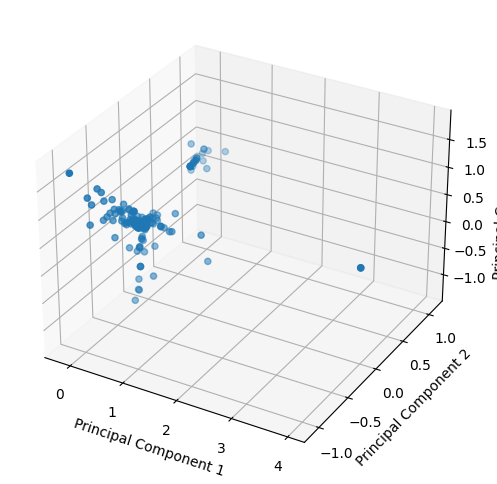

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 가정: df는 우리가 작업하려는 DataFrame입니다.

# PCA 객체를 생성합니다. n_components에는 축소하려는 차원의 수를 지정합니다.
pca = PCA(n_components=3)

# PCA를 적용합니다.
df_pca = pca.fit_transform(dfl)

# 결과 DataFrame을 생성합니다.
df_pca = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# 3D plot을 생성합니다.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], df_pca['Principal Component 3'])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# PCA 객체 생성 및 학습
pca = PCA(n_components=3)  # 주성분 개수를 2로 설정
pca_result = pca.fit_transform(dfl)

# 주성분에 가장 크게 기여하는 단어들 찾기
for i, component in enumerate(pca.components_):
    component_df = pd.DataFrame({'word': dfl.columns, 'contribution': component})
    top_contributions = component_df.sort_values(by='contribution', ascending=False).head(10)
    print(f"For principal component {i+1}, the words with the highest contributions are:")
    print(top_contributions)


For principal component 1, the words with the highest contributions are:
    word  contribution
68    사용      0.299808
192   학생      0.288556
4     계정      0.286085
59    부탁      0.253411
195   해당      0.249788
148   주의      0.226406
40    문제      0.224004
125  익명성      0.219043
63    비방      0.219043
157   책임      0.219043
For principal component 2, the words with the highest contributions are:
     word  contribution
11     구리      0.816261
143    제보      0.121728
153    질문      0.101847
9      관련      0.092599
204    활동      0.069701
28    디자인      0.066449
118  웹페이지      0.064930
43   미니게임      0.062125
15     기능      0.058798
106  업데이트      0.058372
For principal component 3, the words with the highest contributions are:
    word  contribution
37    면학      0.427295
191   학년      0.368000
11    구리      0.326099
36    면컴      0.191633
166  충전기      0.149203
131   자리      0.126057
184   프로      0.110825
108  에어팟      0.104146
93    신분      0.103505
52    보신      0.101664
